# 使用TensorFlow实现线性回归

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [8]:
# 设置学习参数
learning_rate = 0.0001
training_epochs = 1000
display_step = 50

In [9]:
# 训练数据
train_X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [10]:
# 设计计算图
X = tf.placeholder(dtype=tf.float32)
Y = tf.placeholder(dtype=tf.float32)

# 设置权重变量
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

pred = tf.add(tf.multiply(X, W), b)

In [11]:
# 设计损失函数
cost = tf.reduce_sum(tf.pow(pred-Y, 2)) / (2 * n_samples)
# 优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [12]:
# 全局变量初始化操作
init = tf.global_variables_initializer()

Epoch: 0050 Cost: 6.918344975 W = -0.210427 b = 0.139689
Epoch: 0100 Cost: 4.439534664 W = -0.100466 b = 0.155561
Epoch: 0150 Cost: 2.861622334 W = -0.012745 b = 0.168296
Epoch: 0200 Cost: 1.857179046 W = 0.057232 b = 0.178527
Epoch: 0250 Cost: 1.217778921 W = 0.113053 b = 0.186761
Epoch: 0300 Cost: 0.810747862 W = 0.157578 b = 0.193401
Epoch: 0350 Cost: 0.551635385 W = 0.193093 b = 0.198770
Epoch: 0400 Cost: 0.386681080 W = 0.221418 b = 0.203125
Epoch: 0450 Cost: 0.281664819 W = 0.244006 b = 0.206671
Epoch: 0500 Cost: 0.214801297 W = 0.262019 b = 0.209570
Epoch: 0550 Cost: 0.172228426 W = 0.276379 b = 0.211954
Epoch: 0600 Cost: 0.145115927 W = 0.287827 b = 0.213927
Epoch: 0650 Cost: 0.127845600 W = 0.296950 b = 0.215572
Epoch: 0700 Cost: 0.116841629 W = 0.304219 b = 0.216956
Epoch: 0750 Cost: 0.109826513 W = 0.310008 b = 0.218130
Epoch: 0800 Cost: 0.105350249 W = 0.314618 b = 0.219138
Epoch: 0850 Cost: 0.102491230 W = 0.318285 b = 0.220012
Epoch: 0900 Cost: 0.100661375 W = 0.321201 b 

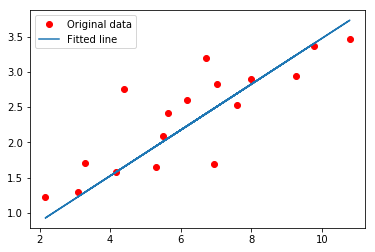

In [21]:
# 开始训练
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
        if (epoch +1) % display_step == 0:
            c= sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print("Epoch: %04d" % (epoch + 1) + " Cost: {:.9f}".format(c) + " W = %f" % sess.run(W) + " b = %f" % sess.run(b))
            
    print("Training Finished!")
    training_cost = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
    print("Training Cost : %f" % training_cost)
# 画图
    plt.plot(train_X, train_Y,'ro', label="Original data")
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label="Fitted line")
    plt.legend()
    plt.show()